# House Price Modelling
Proyek ini bertujuan untuk membangun model untuk memprediksi harga rumah. dalam proyek ini akan digunakan beberapa model diantaranya adalah Regresi Linear, Multiple Regression, K-Nearest Neighbors, dan Random Forest. Setelah dilakukan uji semua model, pada akhirnya akan dilakukan uji komparasi untuk membandingkan semuamodel dan memilih model terbaik berdasarkan beberapa metrics. Metrics yang akan digunakan adalah Root Mean Squared Error (RMSE), R-Squared, Adjusted R-Squared, dan Cross Validation.

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Install semua library

Data yang digunakan adalah data [House Sales in King County](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction) yang diambil dari Kaggle

In [4]:
df = pd.read_csv('Data/kc_house_data.csv')

In [5]:
df_dm = df.copy()

In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# Mengecek Korelasi antarvariable dengan Correlation Matrix


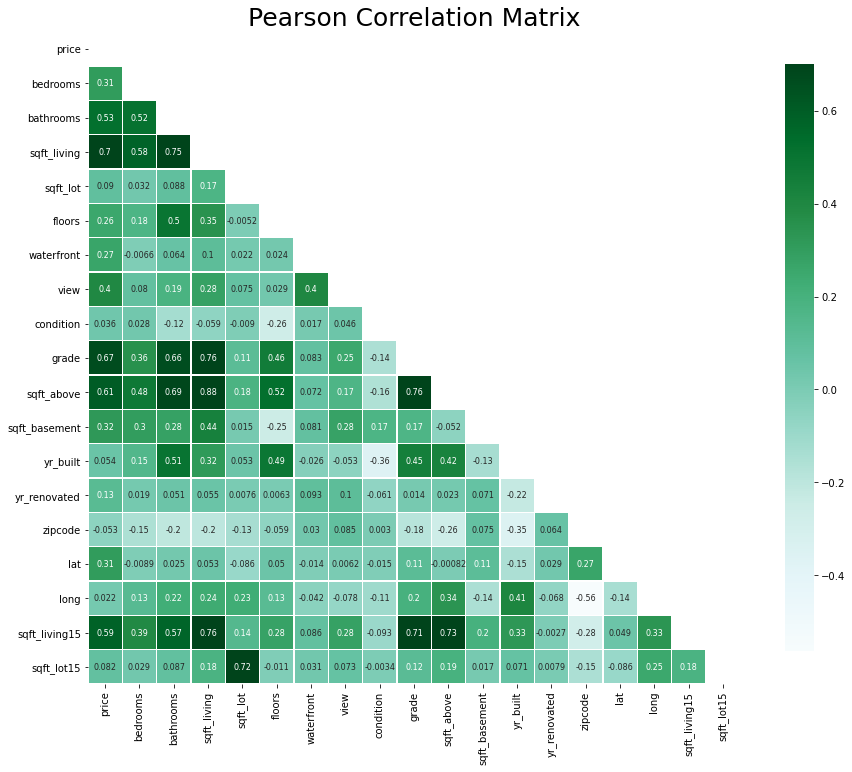

In [8]:
features = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 
            'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 
            'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

mask = np.zeros_like(df[features].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix', fontsize=25)

sns.heatmap(df[features].corr(), linewidths=0.25, vmax=0.7, square=True, cmap="BuGn", #"BuGn_r" to reverse
           linecolor='w', annot=True, annot_kws={"size":8}, mask=mask, cbar_kws={"shrink": .9});

Dari matriks korelasi diatas, dapat dilihat bahwa Luas tanah (sqft_living) sangat berpengaruh terhadap harga rumah (price) dengan nilai korelasi sebesar 0.7. (Warna yang lebih gelap menandakan korelasi yang lebih besar)

# Data Preprocessing

Dalam proyek ini, saya membuat data baru yaitu data yang telah dipreprocessing. Sehingga akan dihasilkan 2 data, yaitu data original dan data yang telah dilakukan preprocessing. Yang pada akhirnya, kedua data ini akan digunakan pada beberapa model sehingga akan diketahui apakah preprocessing akan berpengaruh signifikan terhadap akurasi model

In [9]:
city_id = [100, 101, 102, 103, 104, 105, 106]
city_name = ['Jakarta', 'Bandung', 'Surabaya', 'Pontianak', 'Medan', 'Makassar', 'Jayapura']
animal = ['Dog', 'Cat', 'Rabbit', 'Dog', 'Cat', 'Rabbit', 'Cat']
data = pd.DataFrame(list(zip(city_id, city_name, animal)), columns=['ID', 'City', 'Animal'])

data = pd.get_dummies(data, columns=['City', 'Animal'])
data

,ID,City_Bandung,City_Jakarta,City_Jayapura,City_Makassar,City_Medan,City_Pontianak,City_Surabaya,Animal_Cat,Animal_Dog,Animal_Rabbit
0,100,0,1,0,0,0,0,0,0,1,0
1,101,1,0,0,0,0,0,0,1,0,0
2,102,0,0,0,0,0,0,1,0,0,1
3,103,0,0,0,0,0,1,0,0,1,0
4,104,0,0,0,0,1,0,0,1,0,0
5,105,0,0,0,1,0,0,0,0,0,1
6,106,0,0,1,0,0,0,0,1,0,0


In [10]:
#Mengambil komponen tahun dari kolom 'date'
df_dm['sales_yr']=df_dm['date'].astype(str).str[:4]

#Menambahkan kolom baru "age", yaitu tahun rumah dijual - tahun dibangun 
df_dm['age'] = df_dm['sales_yr'].astype(int)-df['yr_built'].astype(int)

#Menambahkan kolom baru berupa umur renovasi yaitu sejak renovasi hingga rumah dijual
df_dm['age_rnv'] = 0
df_dm['age_rnv'] = df_dm['sales_yr'][df_dm['yr_renovated']!=0].astype(int) - df_dm['yr_renovated'][df_dm['yr_renovated']!=0].astype(int)
df_dm['age_rnv'][df_dm['age_rnv'].isnull()] = 0

#Membagi 'age' ke dalam beberapa range
bins = [-2, 0, 5, 10, 25, 50, 75, 100, 100000]
labels = ['<1', '1-5', '6-10', '11-25', '26-50', '51-75', '76-100', '>100']
df_dm['age_binned'] = pd.cut(df_dm['age'], bins=bins, labels=labels)

#Membagi 'age_rnv' ke dalam beberapa range
bins = [-2, 0, 5, 10, 25, 50, 75, 100000]
labels = ['<1', '1-5', '6-10', '11-25', '26-50', '51-75', '>75']
df_dm['age_rnv_binned'] = pd.cut(df_dm['age_rnv'], bins=bins, labels=labels)

[Text(0.5, 0, 'Renovation Age')]

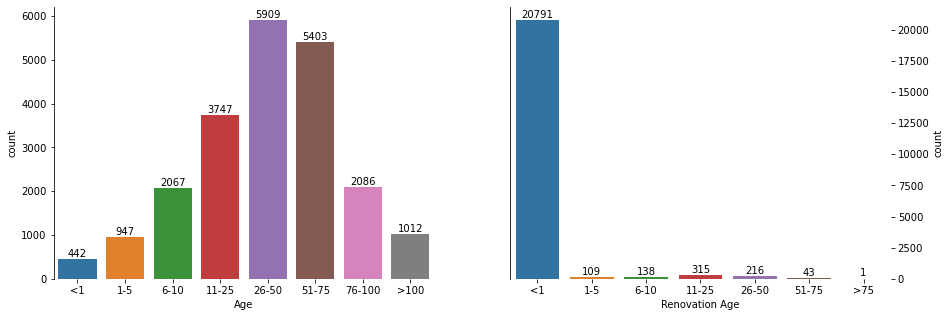

In [11]:
f, axes = plt.subplots(1, 2, figsize=(15,5))
p1 = sns.countplot(df_dm['age_binned'], ax=axes[0])
for p in p1.patches:
    height = p.get_height()
    p1.text(p.get_x()+p.get_width()/2, height+50, height, ha="center")
p2 = sns.countplot(df_dm['age_rnv_binned'], ax=axes[1])
sns.despine(right=True, bottom=True)
for p in p2.patches:
    height = p.get_height()
    p2.text(p.get_x()+p.get_width()/2, height+200, height, ha="center")

axes[0].set(xlabel='Age')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position('right')
axes[1].yaxis.tick_right()
axes[1].set(xlabel='Renovation Age')

In [12]:
#transform factor value agar dapat digunakan (one-hot encoding untuk kolom age_binned dan age_rnv_binned)
df_dm = pd.get_dummies(df_dm, columns=['age_binned', 'age_rnv_binned'])

In [13]:
#Membuat fitur baru yaitu proporsi dari squarefoot living dan squarefoot lot terhadap 15 rumah di terdekat
df_dm['sqft_living_prop'] = df_dm['sqft_living']/df_dm['sqft_living15']
df_dm['sqft_lot_prop'] = df_dm['sqft_lot']/df_dm['sqft_lot15']

Setelah itu, split data menjadi train dan test dengan proporsi 8:2

In [14]:
train_data, test_data = train_test_split(df, train_size=0.8, random_state=3)
train_data_dm, test_data_dm = train_test_split(df_dm, train_size=0.8, random_state=3)

# Membangun Model
Dalam Proyek ini akan digunakan beberapa model yaitu Regresi Linear, Multiple Regression, K-Nearest Neighbors, dan Random Forest. Setelah dilakukan uji semua model, pada akhirnya akan dilakukan uji komparasi untuk membandingkan semuamodel dan memilih model terbaik berdasarkan beberapa metrics. Metrics yang akan digunakan adalah Root Mean Squared Error (RMSE), R-Squared, Adjusted R-Squared, dan Cross Validation.

In [15]:
#list untuk evaluation metrics
evaluation = pd.DataFrame({'Model': [],
                          'Details': [],
                          'Root Mean Squared Error (RMSE)': [],
                          'R-squared (Training)': [],
                          'Adjusted R-squared (Training)': [],
                          'R-squared (Test)': [],
                          'Adjusted R-squared (Test)': [],
                          'S-Fold Cross Validation': []})

## 1. Model simple linear regression

In [16]:
lr = linear_model.LinearRegression()

Konvert data ke dalam bentuk array terlebih dahulu, karena akan dilakukan terhadap satu data (kolom) saja dalam pandas dataframe

In [17]:
X_train = np.array(train_data['sqft_living'], dtype=pd.Series).reshape(-1,1)
y_train = np.array(train_data['price'], dtype=pd.Series)

lr.fit(X_train, y_train)

LinearRegression()

In [18]:
X_test = np.array(test_data['sqft_living'], dtype=pd.Series).reshape(-1,1)
y_test = np.array(test_data['price'], dtype=pd.Series)

pred = lr.predict(X_test)

rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test, pred)), '.3f'))
rtrsm = float(format(lr.score(X_train, y_train), '.3f'))
rtesm = float(format(lr.score(X_train, y_train), '.3f'))
cv = float(format(cross_val_score(lr, df[['sqft_living']], df['price'], cv=5).mean(), '.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ["Simple Linear Regression", '-' , rmsesm, rtrsm, '-', rtesm, '-', cv]

In [19]:
evaluation

,Model,Details,Root Mean Squared Error (RMSE),R-squared (Training),Adjusted R-squared (Training),R-squared (Test),Adjusted R-squared (Test),S-Fold Cross Validation
0,Simple Linear Regression,-,254289.149,0.492,-,0.492,-,0.491


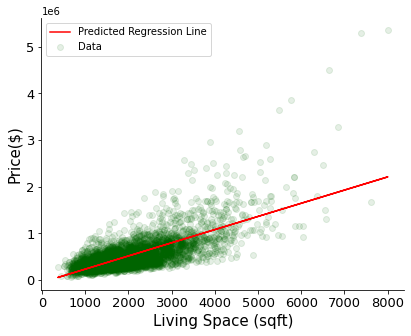

In [20]:
plt.figure(figsize=(6.5,5))
plt.scatter(X_test, y_test, color='darkgreen', label='Data', alpha=.1)
plt.plot(X_test, pred, color='red', label='Predicted Regression Line')
plt.xlabel('Living Space (sqft)', fontsize=15)
plt.ylabel('Price($)', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

Dari grafik di atas, dapat disimpulkan bahwa ternyata model linier belum bisa menyerupai bentuk data yang digunakan, sehingga mungkin akan lebih baik menggunakan exponensial atau orde yang lebih tinggi

In [21]:
#List semua feature pada data yang tidak dilakukan preprocessing
features = list(df.columns)
#Buang kolom id, price, dan date
features = features[3:]
features

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [22]:
complex_model_1 = linear_model.LinearRegression()
complex_model_1.fit(train_data[features], train_data['price'])

pred_cm1 = complex_model_1.predict(test_data[features])

In [23]:
def adjustedR2(r2, n, k):
    return r2 - (k-1)/(n-k)*(1-r2)

In [24]:
#Root Mean Squared Error Complex Model (rmsecm)
rmse_cm = float(format(np.sqrt(metrics.mean_squared_error(test_data['price'], pred_cm1)), '.3f'))
r_train_cm = float(format(complex_model_1.score(train_data[features], train_data['price']), '.3f'))
ars_train_cm = float(format(adjustedR2(complex_model_1.score(train_data[features], train_data['price']), train_data.shape[0], len(features)), '.3f'))
r_test_cm = float(format(complex_model_1.score(test_data[features], test_data['price']), '.3f'))
ars_test_cm = float(format(adjustedR2(complex_model_1.score(test_data[features], test_data['price']), test_data.shape[0], len(features)), '.3f'))
cv_cm = float(format(cross_val_score(complex_model_1, df[features], df['price'], cv=5).mean(), '.3f'))

r = evaluation.shape[0]
evaluation.loc[1] = ["Multiple Regression - 1", 'all features, no preprocessing' , rmse_cm, r_train_cm, ars_train_cm, r_test_cm, ars_test_cm, cv_cm]

In [25]:
evaluation

,Model,Details,Root Mean Squared Error (RMSE),R-squared (Training),Adjusted R-squared (Training),R-squared (Test),Adjusted R-squared (Test),S-Fold Cross Validation
0,Simple Linear Regression,-,254289.149,0.492,-,0.492,-,0.491
1,Multiple Regression - 1,"all features, no preprocessing",193693.989,0.698,0.697,0.708,0.707,0.695


# 3. Complex Model 2
Model yang digunakan sama dengan sebelumnya (Complex Model) namun kali ini menggunakan data yang telah dipreprocess

In [26]:
#Ekstrak featur yang ada di data hasil preprocess
features_prep = list(df_dm.columns)
features_prep = features_prep[3:]
features_prep

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'sales_yr',
 'age',
 'age_rnv',
 'age_binned_<1',
 'age_binned_1-5',
 'age_binned_6-10',
 'age_binned_11-25',
 'age_binned_26-50',
 'age_binned_51-75',
 'age_binned_76-100',
 'age_binned_>100',
 'age_rnv_binned_<1',
 'age_rnv_binned_1-5',
 'age_rnv_binned_6-10',
 'age_rnv_binned_11-25',
 'age_rnv_binned_26-50',
 'age_rnv_binned_51-75',
 'age_rnv_binned_>75',
 'sqft_living_prop',
 'sqft_lot_prop']

In [27]:
#Definisikan dan train model
complex_model_2 = linear_model.LinearRegression()
complex_model_2.fit(train_data_dm[features_prep], train_data_dm['price'])

#predict value x_test
pred_cm2 = complex_model_2.predict(test_data_dm[features_prep])

In [28]:
#ambil semua metrics
rmse_cm2 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'], pred_cm2)), '.3f'))
r_train_cm2 = float(format(complex_model_2.score(train_data_dm[features_prep], train_data_dm['price']), '.3f'))
ars_train_cm2 = float(format(adjustedR2(complex_model_2.score(train_data_dm[features_prep], train_data_dm['price']), train_data_dm.shape[0], len(features_prep)), '.3f'))
r_test_cm2 = float(format(complex_model_2.score(test_data_dm[features_prep], test_data_dm['price']), '.3f'))
ars_test_cm2 = float(format(adjustedR2(complex_model_2.score(test_data_dm[features_prep], test_data_dm['price']), test_data_dm.shape[0], len(features)), '.3f'))
cv_cm2 = float(format(cross_val_score(complex_model_2, df_dm[features_prep], df_dm['price'], cv=5).mean(), '.3f'))

r = evaluation.shape[0]
evaluation.loc[2] = ["Multiple Regression - 2", 'all features, with preprocessing' , rmse_cm2, r_train_cm2, ars_train_cm2, r_test_cm2, ars_test_cm2, cv_cm2]

In [29]:
evaluation

,Model,Details,Root Mean Squared Error (RMSE),R-squared (Training),Adjusted R-squared (Training),R-squared (Test),Adjusted R-squared (Test),S-Fold Cross Validation
0,Simple Linear Regression,-,254289.149,0.492,-,0.492,-,0.491
1,Multiple Regression - 1,"all features, no preprocessing",193693.989,0.698,0.697,0.708,0.707,0.695
2,Multiple Regression - 2,"all features, with preprocessing",188519.082,0.714,0.713,0.723,0.722,0.709


## 4. K-Neighbors Regressor Model 1

In [30]:
#Build model
knnreg1 = KNeighborsRegressor(n_neighbors=15)
knnreg1.fit(train_data_dm[features], train_data_dm['price'])

KNeighborsRegressor(n_neighbors=15)

In [31]:
#Predict
pred_knnreg1 = knnreg1.predict(test_data_dm[features])

In [32]:
#ambil semua metrics
rmse_knnreg1 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'], pred_knnreg1)), '.3f'))
r_train_knnreg1 = float(format(knnreg1.score(train_data_dm[features], train_data_dm['price']), '.3f'))
ars_train_knnreg1 = float(format(adjustedR2(knnreg1.score(train_data_dm[features], train_data_dm['price']), train_data_dm.shape[0], len(features)), '.3f'))
r_test_knnreg1 = float(format(knnreg1.score(test_data[features], test_data['price']), '.3f'))
ars_test_knnreg1 = float(format(adjustedR2(knnreg1.score(test_data[features], test_data['price']), test_data.shape[0], len(features)), '.3f'))
cv_knnreg1 = float(format(cross_val_score(knnreg1, df_dm[features], df_dm['price'], cv=5).mean(), '.3f'))

evaluation.loc[3] = ["KNN Regression - 1", '15 Neighbors, no preprocessing' , rmse_knnreg1, r_train_knnreg1, ars_train_knnreg1, r_test_knnreg1, ars_test_knnreg1, cv_knnreg1]

In [33]:
evaluation

,Model,Details,Root Mean Squared Error (RMSE),R-squared (Training),Adjusted R-squared (Training),R-squared (Test),Adjusted R-squared (Test),S-Fold Cross Validation
0,Simple Linear Regression,-,254289.149,0.492,-,0.492,-,0.491
1,Multiple Regression - 1,"all features, no preprocessing",193693.989,0.698,0.697,0.708,0.707,0.695
2,Multiple Regression - 2,"all features, with preprocessing",188519.082,0.714,0.713,0.723,0.722,0.709
3,KNN Regression - 1,"15 Neighbors, no preprocessing",244119.063,0.564,0.564,0.536,0.534,0.499


## 5. K-Neighbors Regressor Model 2
Model ini menggunakan jumlah n_neighbors sebanyak 25

In [34]:
#Build model
knnreg2 = KNeighborsRegressor(n_neighbors=25)
knnreg2.fit(train_data_dm[features], train_data_dm['price'])

KNeighborsRegressor(n_neighbors=25)

In [35]:
#Predict
pred_knnreg2 = knnreg2.predict(test_data_dm[features])

In [36]:
#ambil semua metrics
rmse_knnreg2 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'], pred_knnreg2)), '.3f'))
r_train_knnreg2 = float(format(knnreg2.score(train_data_dm[features], train_data_dm['price']), '.3f'))
ars_train_knnreg2 = float(format(adjustedR2(knnreg2.score(train_data_dm[features], train_data_dm['price']), train_data_dm.shape[0], len(features)), '.3f'))
r_test_knnreg2 = float(format(knnreg2.score(test_data[features], test_data['price']), '.3f'))
ars_test_knnreg2 = float(format(adjustedR2(knnreg2.score(test_data[features], test_data['price']), test_data.shape[0], len(features)), '.3f'))
cv_knnreg2 = float(format(cross_val_score(knnreg2, df_dm[features], df_dm['price'], cv=5).mean(), '.3f'))

evaluation.loc[4] = ["KNN Regression - 2", '25 Neighbors, no preprocessing' , rmse_knnreg2, r_train_knnreg2, ars_train_knnreg2, r_test_knnreg2, ars_test_knnreg2, cv_knnreg2]

In [37]:
evaluation

,Model,Details,Root Mean Squared Error (RMSE),R-squared (Training),Adjusted R-squared (Training),R-squared (Test),Adjusted R-squared (Test),S-Fold Cross Validation
0,Simple Linear Regression,-,254289.149,0.492,-,0.492,-,0.491
1,Multiple Regression - 1,"all features, no preprocessing",193693.989,0.698,0.697,0.708,0.707,0.695
2,Multiple Regression - 2,"all features, with preprocessing",188519.082,0.714,0.713,0.723,0.722,0.709
3,KNN Regression - 1,"15 Neighbors, no preprocessing",244119.063,0.564,0.564,0.536,0.534,0.499
4,KNN Regression - 2,"25 Neighbors, no preprocessing",247004.334,0.530,0.53,0.525,0.523,0.488


## 6. Model Random Forest 1 (Non-Preprocessing)
Model kali ini akan menggunakan Random Forest, dimana ini merupakan model yang terdiri dari beberapa submodel Decision Tree yang kemudian digabungkan dan dicari bobot yang paling optimal.

In [45]:
from sklearn.ensemble import RandomForestRegressor
random_forest1 = RandomForestRegressor()

In [46]:
#Latih model
random_forest1.fit(train_data[features], train_data['price'])

RandomForestRegressor()

In [47]:
#predict
pred_random_forest1 = random_forest1.predict(test_data[features])

In [48]:
#ambil semua metrics
rmse_random_forest1 = float(format(np.sqrt(metrics.mean_squared_error(test_data['price'], pred_random_forest1)), '.3f'))
r_train_random_forest1 = float(format(random_forest1.score(train_data[features], train_data['price']), '.3f'))
ars_train_random_forest1 = float(format(adjustedR2(random_forest1.score(train_data[features], train_data['price']), train_data.shape[0], len(features)), '.3f'))
r_test_random_forest1 = float(format(random_forest1.score(test_data[features], test_data['price']), '.3f'))
ars_test_random_forest1 = float(format(adjustedR2(random_forest1.score(test_data[features], test_data['price']), test_data.shape[0], len(features)), '.3f'))
cv_random_forest1 = float(format(cross_val_score(random_forest1, df[features], df['price'], cv=5).mean(), '.3f'))

evaluation.loc[5] = ["Random Forest Regression-1", 'no preprocessing' , rmse_random_forest1, r_train_random_forest1, ars_train_random_forest1, r_test_random_forest1, ars_test_random_forest1, cv_random_forest1]

In [49]:
evaluation

,Model,Details,Root Mean Squared Error (RMSE),R-squared (Training),Adjusted R-squared (Training),R-squared (Test),Adjusted R-squared (Test),S-Fold Cross Validation
0,Simple Linear Regression,-,254289.149,0.492,-,0.492,-,0.491
1,Multiple Regression - 1,"all features, no preprocessing",193693.989,0.698,0.697,0.708,0.707,0.695
2,Multiple Regression - 2,"all features, with preprocessing",188519.082,0.714,0.713,0.723,0.722,0.709
3,KNN Regression - 1,"15 Neighbors, no preprocessing",244119.063,0.564,0.564,0.536,0.534,0.499
4,KNN Regression - 2,"25 Neighbors, no preprocessing",247004.334,0.530,0.53,0.525,0.523,0.488
5,Random Forest Regression-1,no preprocessing,119372.910,0.982,0.982,0.889,0.889,0.876


## 7. Model Random Forest 2 (Preprocessing)
Model kali ini akan menggunakan Random Forest juga, akan tetapi menggunakan data yang telah melalui preprocessing

In [50]:
#Build model
random_forest2 = RandomForestRegressor()

In [51]:
#train model
random_forest2.fit(train_data_dm[features], train_data_dm['price'])

RandomForestRegressor()

In [52]:
#predict
pred_random_forest2 = random_forest2.predict(test_data_dm[features])

In [55]:
#ambil semua metrics
rmse_random_forest2 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'], pred_random_forest2)), '.3f'))
r_train_random_forest2 = float(format(random_forest2.score(train_data_dm[features], train_data_dm['price']), '.3f'))
ars_train_random_forest2 = float(format(adjustedR2(random_forest2.score(train_data_dm[features], train_data_dm['price']), train_data_dm.shape[0], len(features)), '.3f'))
r_test_random_forest2 = float(format(random_forest2.score(test_data_dm[features], test_data_dm['price']), '.3f'))
ars_test_random_forest2 = float(format(adjustedR2(random_forest2.score(test_data_dm[features], test_data_dm['price']), test_data_dm.shape[0], len(features)), '.3f'))
cv_random_forest2 = float(format(cross_val_score(random_forest2, df_dm[features], df_dm['price'], cv=5).mean(), '.3f'))

evaluation.loc[6] = ["Random Forest Regression-2", 'with preprocessing' , rmse_random_forest2, r_train_random_forest2, ars_train_random_forest2, r_test_random_forest2, ars_test_random_forest2, cv_random_forest2]

In [56]:
evaluation

,Model,Details,Root Mean Squared Error (RMSE),R-squared (Training),Adjusted R-squared (Training),R-squared (Test),Adjusted R-squared (Test),S-Fold Cross Validation
0,Simple Linear Regression,-,254289.149,0.492,-,0.492,-,0.491
1,Multiple Regression - 1,"all features, no preprocessing",193693.989,0.698,0.697,0.708,0.707,0.695
2,Multiple Regression - 2,"all features, with preprocessing",188519.082,0.714,0.713,0.723,0.722,0.709
3,KNN Regression - 1,"15 Neighbors, no preprocessing",244119.063,0.564,0.564,0.536,0.534,0.499
4,KNN Regression - 2,"25 Neighbors, no preprocessing",247004.334,0.530,0.53,0.525,0.523,0.488
5,Random Forest Regression-1,no preprocessing,119372.910,0.982,0.982,0.889,0.889,0.876
6,Random Forest Regression-2,with preprocessing,120468.372,0.982,0.982,0.887,0.886,0.877


Setelah dibandingkan semua model, ternyata didapatkan bahwa model yang paling baik adalah random Forest dengan menggunakan data tanpa preprocessing. Model ini memberikan nilai Adjusted R-Squared sebesar 0,982 (Train) dan 0,886 (Test).

Akan tetapi terlihat fenomena dimana Multiple Regression tidak lebih baik dalam menjawab permasalahan ini dibanding Random Forest. Dugaan awal yaitu karena terdapat data yang unik dalam dataframe yaitu data geografis berupa Longitud ('long') dan Latitude ('lat'). 

Untuk menelisik lebih lanjut, saya akan mencoba memvisualisasikan data long dan lat terlebih dahulu

In [61]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

<AxesSubplot:xlabel='long', ylabel='lat'>

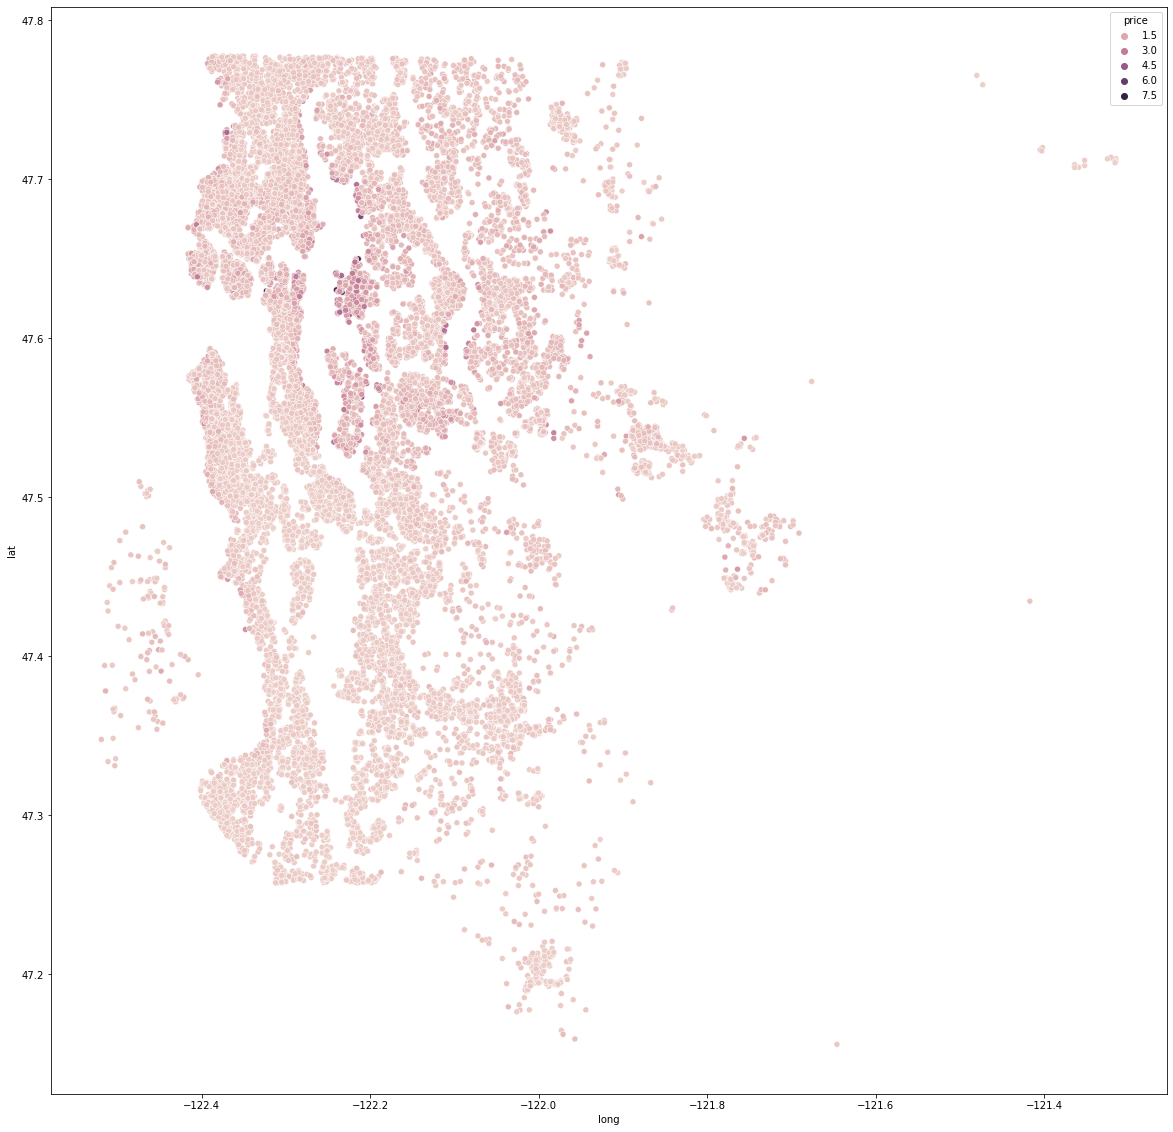

In [67]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
sns.scatterplot(data=df, x='long', y='lat', hue='price')

Dari data di atas, dapat diketahui bahwa harga memiliki nilai yang lebih tinggi hanya di beberapa area tertentu saja. Dalam hal ini di antara longitude -122.3 hingga -122.1 dan antara latitude 47.5 hingga 47.7. 
Sehingga, data harga dapat dikatakan tidak 'linear', sehingga tidak cocok untuk dilaukukan metode regresi tanpa dilakukan preprocessing terlbeih dahulu. 